In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler

In [156]:
df = pd.read_parquet('C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/FemaDataWithWaterDepthStatistics2.parquet.gzip')

In [158]:
df.shape[0]

1979821

In [159]:
#get rid of NaNs for proportionLeqOne
df = df[~df['proportionLeqOne'].isna()]


In [ ]:
['proportionLeqOne', 'relativeDamage','elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix', 'numberOfFloorsInTheInsuredBuilding', 'buildingPropertyValue']

# Variables related to water depth: proportionLeqOne, relativeDamage, elevationDifference

In [5]:
df_six = df[df['waterDepth'] == 6]

In [162]:
# Data preparation
X = df_six[['proportionLeqOne', 'relativeDamage']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [7]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1

cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]

In [8]:
cluster_one['relativeDamage'].median()

0.8615553653876771

In [9]:
len(cluster_one) / (len(X))

0.3480618918487797

In [10]:
len(cluster_two) / (len(X))

0.6519381081512203

In [11]:
cluster_two['relativeDamage'].median()

0.10996550756557705

In [12]:
df_six['relativeDamage'].median()

0.26565696712782594

In [13]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage']]
new_labels = kmeans.predict(X_2)

In [14]:
sum(new_labels)

906358

In [15]:
len(df_zero_and_one)

974334

In [16]:
len(cluster_one)

13092

In [17]:
906358 / 974334

0.9302333696658436

# Miscellaneous

In [259]:
# Data preparation
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'buildingPropertyValue','proportionLeqSix', 'numberOfFloorsInTheInsuredBuilding']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=7, n_init=10, random_state=42)

In [260]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3
mask_cluster_five = kmeans.labels_ == 4
mask_cluster_six = kmeans.labels_ == 5
mask_cluster_seven = kmeans.labels_ == 6


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_four]
cluster_five = df_six[mask_cluster_five]
cluster_six = df_six[mask_cluster_six]
cluster_seven = df_six[mask_cluster_seven]

In [261]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Compute the silhouette score for all samples
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"The overall silhouette score is: {silhouette_avg}")

# Compute the silhouette score for each sample
sample_silhouette_values = silhouette_samples(X_scaled, kmeans.labels_)

# Compute the mean silhouette score for each cluster
for i in range(len(np.unique(kmeans.labels_))):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    print(f"Mean silhouette score for cluster {i}: {ith_cluster_silhouette_values.mean()}")


The overall silhouette score is: 0.274359825886878
Mean silhouette score for cluster 0: 0.33531002076270744
Mean silhouette score for cluster 1: 0.11655558640379023
Mean silhouette score for cluster 2: 0.0
Mean silhouette score for cluster 3: 0.43714669762442976
Mean silhouette score for cluster 4: 0.35826246166956605
Mean silhouette score for cluster 5: 0.2774845579807191
Mean silhouette score for cluster 6: 0.19525478340880933


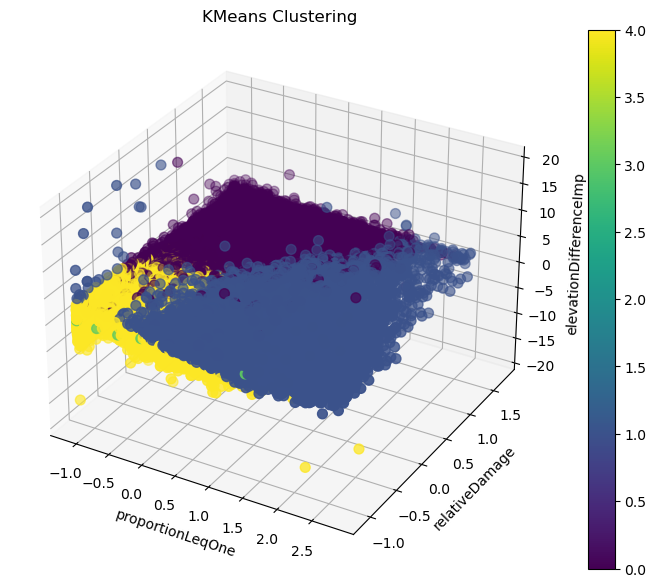

In [234]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                      c=kmeans.labels_, cmap='viridis', s=50)

ax.set_title('KMeans Clustering')
ax.set_xlabel('proportionLeqOne')
ax.set_ylabel('relativeDamage')
ax.set_zlabel('elevationDifferenceImp')
plt.colorbar(scatter)
plt.show()

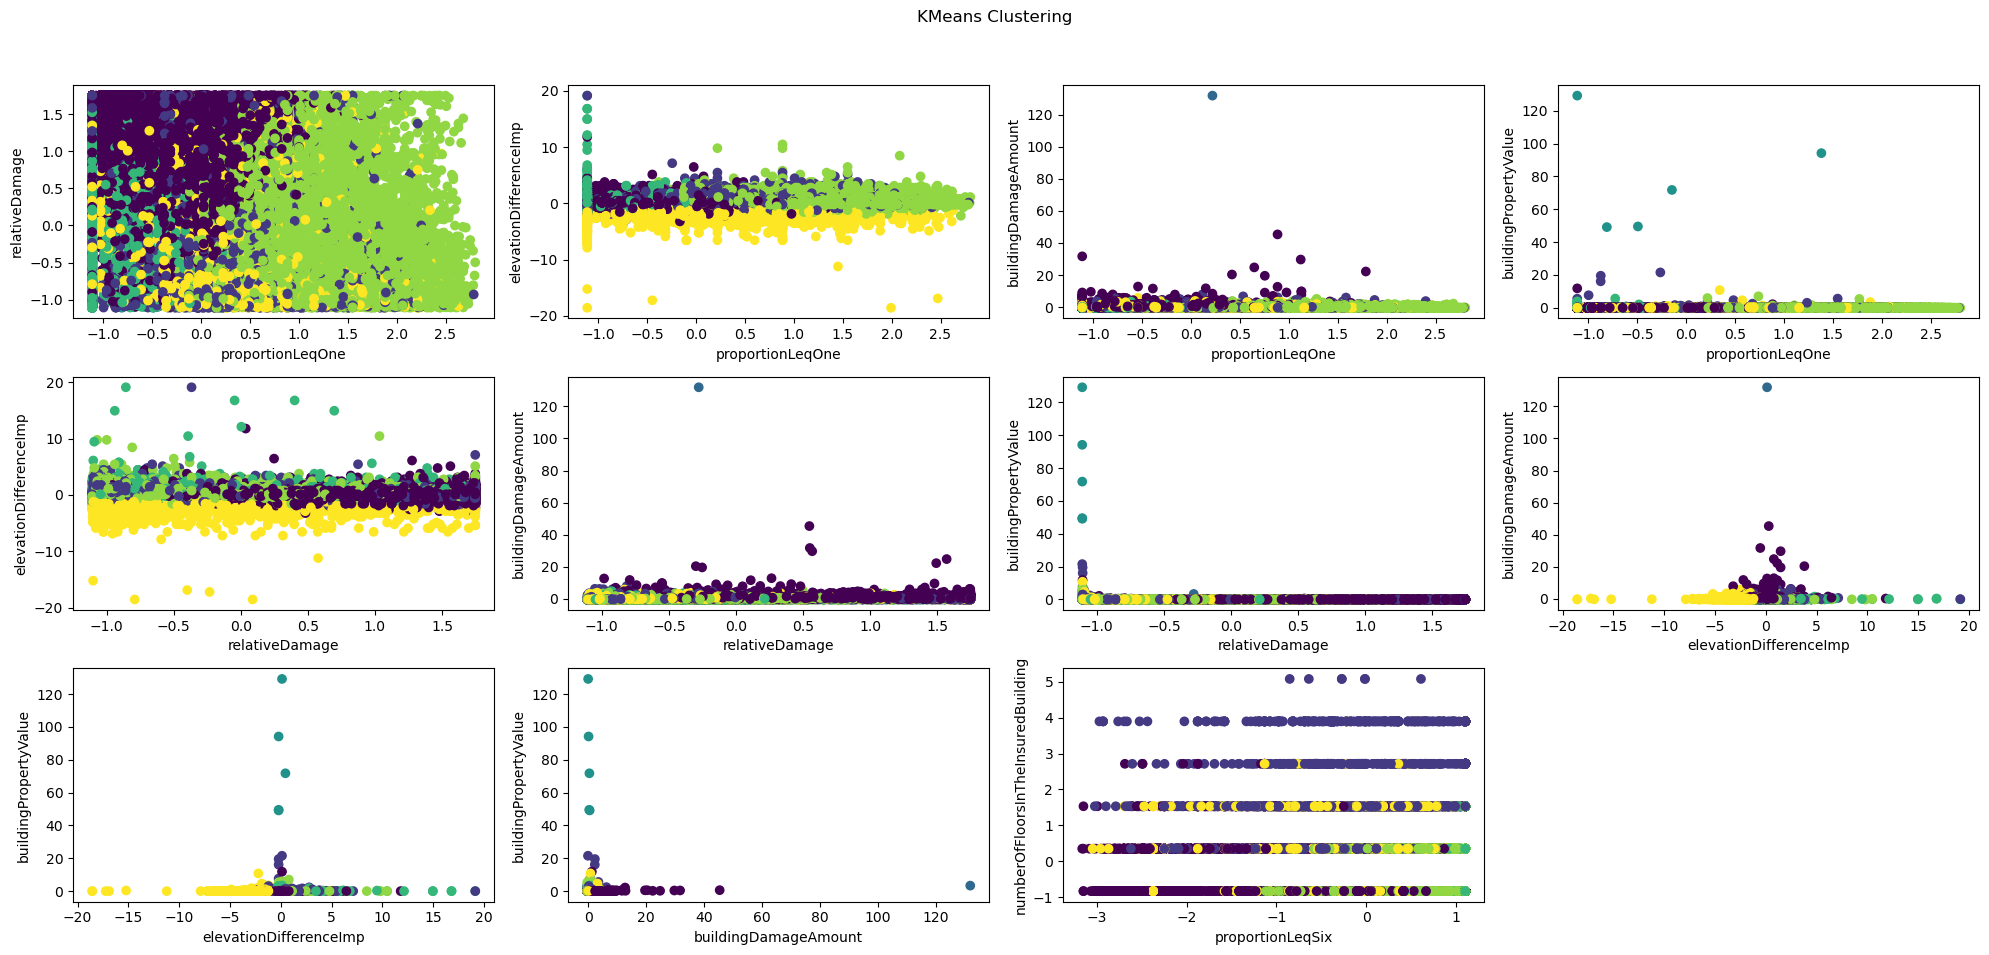

In [264]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 4, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('proportionLeqOne')
plt.ylabel('relativeDamage')

plt.subplot(3, 4, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('proportionLeqOne')
plt.ylabel('elevationDifferenceImp')

plt.subplot(3, 4, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=kmeans.labels_, cmap='viridis')
plt.xlabel('proportionLeqOne')
plt.ylabel('buildingDamageAmount')

plt.subplot(3, 4, 4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 4], c=kmeans.labels_, cmap='viridis')
plt.xlabel('proportionLeqOne')
plt.ylabel('buildingPropertyValue')

plt.subplot(3, 4, 5)
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('relativeDamage')
plt.ylabel('elevationDifferenceImp')

plt.subplot(3, 4, 6)
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], c=kmeans.labels_, cmap='viridis')
plt.xlabel('relativeDamage')
plt.ylabel('buildingDamageAmount')

plt.subplot(3, 4, 7)
plt.scatter(X_scaled[:, 1], X_scaled[:, 4], c=kmeans.labels_, cmap='viridis')
plt.xlabel('relativeDamage')
plt.ylabel('buildingPropertyValue')

plt.subplot(3, 4, 8)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=kmeans.labels_, cmap='viridis')
plt.xlabel('elevationDifferenceImp')
plt.ylabel('buildingDamageAmount')

plt.subplot(3, 4, 9)
plt.scatter(X_scaled[:, 2], X_scaled[:, 4], c=kmeans.labels_, cmap='viridis')
plt.xlabel('elevationDifferenceImp')
plt.ylabel('buildingPropertyValue')

plt.subplot(3, 4, 10)
plt.scatter(X_scaled[:, 3], X_scaled[:, 4], c=kmeans.labels_, cmap='viridis')
plt.xlabel('buildingDamageAmount')
plt.ylabel('buildingPropertyValue')

plt.subplot(3, 4, 11)
plt.scatter(X_scaled[:, 5], X_scaled[:, 6], c=kmeans.labels_, cmap='viridis')
plt.xlabel('proportionLeqSix')
plt.ylabel('numberOfFloorsInTheInsuredBuilding')

plt.suptitle('KMeans Clustering')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [262]:
import scipy.stats as stats

# Create a list to store the clusters

# clusters = [cluster_one, cluster_two, cluster_three, cluster_four, cluster_five]

# clusters = [cluster_one, cluster_two, cluster_three, cluster_four, cluster_five, cluster_six]

clusters = [cluster_one, cluster_two, cluster_three, cluster_four, cluster_five, cluster_six, cluster_seven]

# For each feature in the dataset
for feature in X.columns:
    # Get the values of the feature for each cluster
    values = [cluster[feature].values for cluster in clusters]
    # Perform the one-way ANOVA test
    f_stat, p_value = stats.f_oneway(*values)
    print(f"Feature: {feature}")
    print(f"F-statistic: {f_stat:.2f}")
    print(f"P-value: {p_value:.5f}")
    print()


Feature: proportionLeqOne
F-statistic: 11380.09
P-value: 0.00000

Feature: relativeDamage
F-statistic: 8770.08
P-value: 0.00000

Feature: elevationDifferenceImp
F-statistic: 5382.52
P-value: 0.00000

Feature: buildingDamageAmount
F-statistic: 8273.94
P-value: 0.00000

Feature: buildingPropertyValue
F-statistic: 30062.46
P-value: 0.00000

Feature: proportionLeqSix
F-statistic: 5756.29
P-value: 0.00000

Feature: numberOfFloorsInTheInsuredBuilding
F-statistic: 5289.66
P-value: 0.00000



In [263]:
# For each feature in the dataset
for feature in X.columns:
    # Get the values of the feature for the entire dataset
    values_all = X_scaled[:, X.columns.get_loc(feature)]
    # For each cluster
    for i, cluster in enumerate(clusters):
        # Get the values of the feature for the cluster
        values_cluster = cluster[feature].values
        # Perform the t-test
        t_stat, p_value = stats.ttest_ind(values_all, values_cluster)
        print(f"Feature: {feature}, Cluster: {i}")
        print(f"T-statistic: {t_stat:.2f}")
        print(f"P-value: {p_value:.5f}")
        print()


Feature: proportionLeqOne, Cluster: 0
T-statistic: -13.18
P-value: 0.00000

Feature: proportionLeqOne, Cluster: 1
T-statistic: -27.76
P-value: 0.00000

Feature: proportionLeqOne, Cluster: 2
T-statistic: nan
P-value: nan

Feature: proportionLeqOne, Cluster: 3
T-statistic: -0.49
P-value: 0.62323

Feature: proportionLeqOne, Cluster: 4
T-statistic: -2.26
P-value: 0.02393

Feature: proportionLeqOne, Cluster: 5
T-statistic: -55.83
P-value: 0.00000

Feature: proportionLeqOne, Cluster: 6
T-statistic: -18.04
P-value: 0.00000

Feature: relativeDamage, Cluster: 0
T-statistic: -83.27
P-value: 0.00000

Feature: relativeDamage, Cluster: 1
T-statistic: -16.57
P-value: 0.00000

Feature: relativeDamage, Cluster: 2
T-statistic: nan
P-value: nan

Feature: relativeDamage, Cluster: 3
T-statistic: -0.00
P-value: 0.99987

Feature: relativeDamage, Cluster: 4
T-statistic: -14.68
P-value: 0.00000

Feature: relativeDamage, Cluster: 5
T-statistic: -26.15
P-value: 0.00000

Feature: relativeDamage, Cluster: 6
T-sta

C:\Users\Asus\AppData\Local\Temp\ipykernel_28568\845446575.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(values_all, values_cluster)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [19]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1

cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]

In [20]:
cluster_one['relativeDamage'].median()

0.1100451127819548

In [21]:
cluster_two['relativeDamage'].median()

0.8618181818181818

In [22]:
df_six['relativeDamage'].median()

0.26565696712782594

In [23]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
new_labels = kmeans.predict(X_2)

In [24]:
sum(new_labels)

93971

In [25]:
len(df_zero_and_one)

974334

In [26]:
len(cluster_one)

24533

In [27]:
len(df_six)

37614

# Three Variables and Three Clusters

In [28]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [29]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]

In [30]:
cluster_one['relativeDamage'].median()

0.0963848550306193

In [31]:
cluster_two['relativeDamage'].median()

0.13290101411735689

In [32]:
cluster_three['relativeDamage'].median()

0.8575468102632193

In [33]:
df_six['relativeDamage'].median()

0.26565696712782594

In [34]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix']]
new_labels = kmeans.predict(X_2)

In [35]:
sum(new_labels == 0)

0

In [36]:
sum(new_labels == 1)

3769

In [37]:
sum(new_labels == 2)

970565

In [38]:
len(cluster_three) / len(df_six)

0.33070133460945395

# Three Variables and Four Clusters

In [58]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [59]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [60]:
cluster_one['relativeDamage'].median()

0.9080107477000182

In [61]:
cluster_two['relativeDamage'].median()

0.11583668925409556

In [62]:
cluster_three['relativeDamage'].median()

0.14489720647980975

In [63]:
df_six['relativeDamage'].median()

0.26565696712782594

In [64]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [65]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

2    8674
3    1022
0     303
1       1
dtype: int64

In [66]:
len(cluster_three) / len(df_six)

0.3392885627691817

# Three Variables and Five Clusters

In [164]:
# Data preparation
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [166]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Compute the silhouette score for all samples
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"The overall silhouette score is: {silhouette_avg}")

# Compute the silhouette score for each sample
sample_silhouette_values = silhouette_samples(X_scaled, kmeans.labels_)

# Compute the mean silhouette score for each cluster
for i in range(5):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    print(f"Mean silhouette score for cluster {i}: {ith_cluster_silhouette_values.mean()}")


The overall silhouette score is: 0.41391881920445384
Mean silhouette score for cluster 0: 0.15601608601268915
Mean silhouette score for cluster 1: 0.47881798182474244
Mean silhouette score for cluster 2: 0.4886994972501364
Mean silhouette score for cluster 3: 0.2939135411084862
Mean silhouette score for cluster 4: 0.36103814543846713


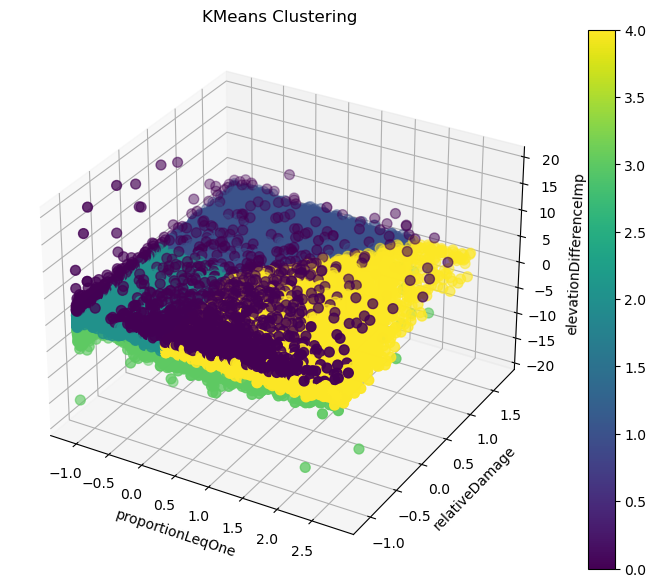

In [167]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                      c=kmeans.labels_, cmap='viridis', s=50)

ax.set_title('KMeans Clustering')
ax.set_xlabel('proportionLeqOne')
ax.set_ylabel('relativeDamage')
ax.set_zlabel('elevationDifferenceImp')
plt.colorbar(scatter)
plt.show()

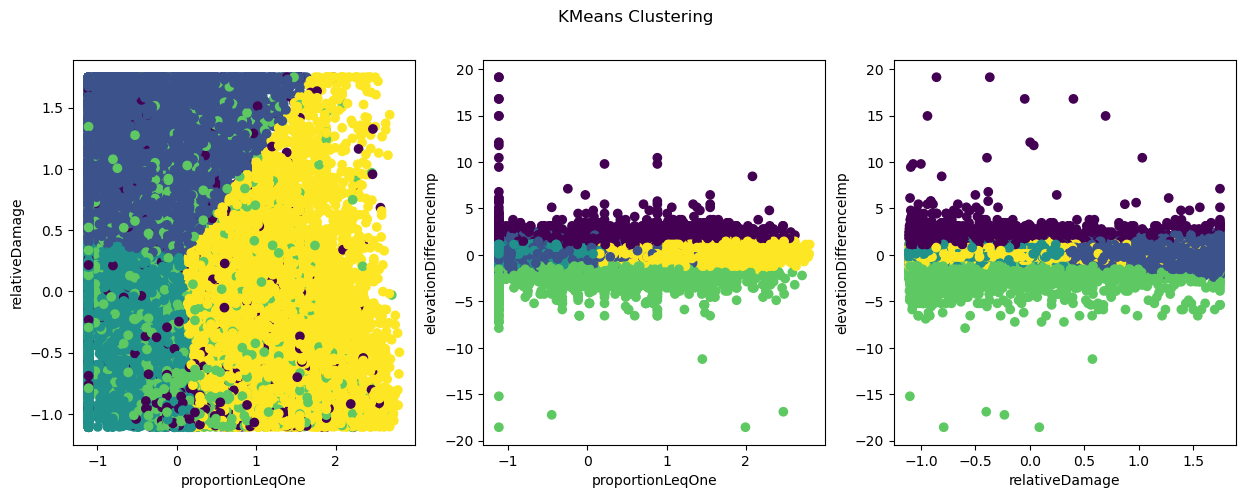

In [168]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('proportionLeqOne')
plt.ylabel('relativeDamage')

plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('proportionLeqOne')
plt.ylabel('elevationDifferenceImp')

plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('relativeDamage')
plt.ylabel('elevationDifferenceImp')

plt.suptitle('KMeans Clustering')
plt.show()

In [173]:
import scipy.stats as stats

# Create a list to store the clusters
clusters = [cluster_one, cluster_two, cluster_three, cluster_four]

# For each feature in the dataset
for feature in X.columns:
    # Get the values of the feature for each cluster
    values = [cluster[feature].values for cluster in clusters]
    # Perform the one-way ANOVA test
    f_stat, p_value = stats.f_oneway(*values)
    print(f"Feature: {feature}")
    print(f"F-statistic: {f_stat:.2f}")
    print(f"P-value: {p_value:.5f}")
    print()


Feature: proportionLeqOne
F-statistic: 16899.81
P-value: 0.00000

Feature: relativeDamage
F-statistic: 153.57
P-value: 0.00000

Feature: elevationDifferenceImp
F-statistic: 4094.14
P-value: 0.00000



In [171]:
# For each feature in the dataset
for feature in X.columns:
    # Get the values of the feature for the entire dataset
    values_all = X_scaled[:, X.columns.get_loc(feature)]
    # For each cluster
    for i, cluster in enumerate(clusters):
        # Get the values of the feature for the cluster
        values_cluster = cluster[feature].values
        # Perform the t-test
        t_stat, p_value = stats.ttest_ind(values_all, values_cluster)
        print(f"Feature: {feature}, Cluster: {i}")
        print(f"T-statistic: {t_stat:.2f}")
        print(f"P-value: {p_value:.5f}")
        print()


Feature: proportionLeqOne, Cluster: 0
T-statistic: 3409.07
P-value: 0.00000

Feature: proportionLeqOne, Cluster: 1
T-statistic: 8.42
P-value: 0.00372

Feature: proportionLeqOne, Cluster: 2
T-statistic: 149.80
P-value: 0.00000

Feature: proportionLeqOne, Cluster: 3
T-statistic: 149.80
P-value: 0.00000

Feature: relativeDamage, Cluster: 0
T-statistic: 703.36
P-value: 0.00000

Feature: relativeDamage, Cluster: 1
T-statistic: 234.44
P-value: 0.00000

Feature: relativeDamage, Cluster: 2
T-statistic: 50.43
P-value: 0.00000

Feature: relativeDamage, Cluster: 3
T-statistic: 50.43
P-value: 0.00000

Feature: elevationDifferenceImp, Cluster: 0
T-statistic: 10889.77
P-value: 0.00000

Feature: elevationDifferenceImp, Cluster: 1
T-statistic: 4205.59
P-value: 0.00000

Feature: elevationDifferenceImp, Cluster: 2
T-statistic: 46835.24
P-value: 0.00000

Feature: elevationDifferenceImp, Cluster: 3
T-statistic: 46835.24
P-value: 0.00000



In [50]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [51]:
cluster_one['relativeDamage'].median()

0.0962512403897729

In [52]:
cluster_two['relativeDamage'].median()

0.15214155671014315

In [53]:
cluster_three['relativeDamage'].median()

0.9112426897041765

In [54]:
df_six['relativeDamage'].median()

0.26565696712782594

In [55]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [56]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

1    5920
0    2876
3     944
2     259
4       1
dtype: int64

In [57]:
len(cluster_two) / len(df_six)

0.3147764130376987

# Two Variables and Five Clusters

In [67]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [68]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]

In [69]:
cluster_one['relativeDamage'].median()

0.660762569066186

In [70]:
cluster_two['relativeDamage'].median()

0.9304205829276448

In [71]:
cluster_three['relativeDamage'].median()

0.1046181818181818

In [72]:
df_six['relativeDamage'].median()

0.26565696712782594

In [73]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

3    9693
2    9241
1    9220
4    5303
0    4157
dtype: int64

In [74]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [75]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

0    7414
3    2586
dtype: int64

In [76]:
len(cluster_two) / len(df_six)

0.24512149731482957

# Three Variables and Six Clusters

In [153]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [154]:
X

,proportionLeqOne,relativeDamage,elevationDifferenceImp
36,0.928688,1.586302,0.121226
39,-0.113594,0.333323,0.121226
339,-0.881921,1.747697,1.789402
345,-0.897208,1.275982,0.121226
419,-0.859694,0.132617,-0.212409
...,...,...,...
1979655,0.228291,-0.988211,1.122131
1979671,0.291124,1.304523,-0.212409
1979688,0.054263,0.516811,0.788496
1979707,-0.356424,-1.014308,-2.214219


In [78]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [79]:
cluster_one['relativeDamage'].median()

0.1174671231697031

In [80]:
cluster_two['relativeDamage'].median()

0.1042330381232565

In [81]:
cluster_three['relativeDamage'].median()

0.0886558627264061

In [82]:
df_six['relativeDamage'].median()

0.26565696712782594

In [83]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    9972
1    9743
4    8983
3    4315
5    2958
2    1643
dtype: int64

In [84]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [85]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

3    5977
2    2594
5     937
1     492
dtype: int64

In [86]:
len(cluster_two) / len(df_six)

0.2590258946137077

# Three Variables and Seven Clusters

In [87]:
kmeans = KMeans(n_clusters = 7, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [88]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [89]:
cluster_one['relativeDamage'].median()

0.10584623175028805

In [90]:
cluster_two['relativeDamage'].median()

0.11013551741323865

In [91]:
cluster_three['relativeDamage'].median()

0.0872527472527472

In [92]:
df_six['relativeDamage'].median()

0.26565696712782594

In [93]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

4    8976
0    8166
3    7889
1    4650
6    3637
5    2989
2    1307
dtype: int64

In [94]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [95]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

6    4059
2    2590
3    2415
5     936
dtype: int64

In [96]:
len(cluster_two) / len(df_six)

0.12362418248524486

# Three Variables and Eight Clusters

In [97]:
kmeans = KMeans(n_clusters = 8, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

In [98]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [99]:
cluster_one['relativeDamage'].median()

0.7201290493604362

In [100]:
cluster_two['relativeDamage'].median()

0.1191087249068386

In [101]:
cluster_three['relativeDamage'].median()

0.0694171529881066

In [102]:
df_six['relativeDamage'].median()

0.26565696712782594

In [103]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

1    7674
6    7247
2    6391
7    4472
5    4410
0    3152
3    2968
4    1300
dtype: int64

In [104]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [105]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

0    3413
1    3022
4    2590
3     936
5      39
dtype: int64

In [106]:
len(cluster_two) / len(df_six)

0.20401977986919764

# Three Variables and Nine Clusters

In [107]:
kmeans = KMeans(n_clusters = 9, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

In [108]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [109]:
cluster_one['relativeDamage'].median()

0.1147551015866657

In [110]:
cluster_two['relativeDamage'].median()

0.5069444444444444

In [111]:
cluster_three['relativeDamage'].median()

0.06867827776655215

In [112]:
df_six['relativeDamage'].median()

0.26565696712782594

In [113]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

6    7416
4    7219
2    6442
1    4385
0    4351
8    3120
5    2228
7    1286
3    1167
dtype: int64

In [114]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [115]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

8    3116
6    3090
7    2588
3     707
5     474
1      25
dtype: int64

In [116]:
len(cluster_two) / len(df_six)

0.11657893337587069

# Three Variables and Ten Clusters

In [117]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [118]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [119]:
cluster_one['relativeDamage'].median()

0.505616428058082

In [120]:
cluster_two['relativeDamage'].median()

0.1193867663344407

In [121]:
cluster_three['relativeDamage'].median()

0.12302616435976274

In [122]:
df_six['relativeDamage'].median()

0.26565696712782594

In [123]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

1    7435
8    7216
3    6210
0    4324
4    4283
7    3098
6    1863
5    1474
9    1271
2     440
dtype: int64

In [124]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [125]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

7    3134
1    3065
9    2588
2     642
6     518
0      45
5       8
dtype: int64

In [126]:
len(cluster_two) / len(df_six)

0.197665762747913

In [127]:
# Three Variables and Seven Clusters

kmeans = KMeans(n_clusters = 7, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


cluster_one['relativeDamage'].median()

cluster_two['relativeDamage'].median()

cluster_three['relativeDamage'].median()

df_six['relativeDamage'].median()

labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

len(cluster_two) / len(df_six)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.12362418248524486

# Three Variables and Eleven Clusters

In [128]:
kmeans = KMeans(n_clusters = 11, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11, random_state=42)

In [129]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [130]:
cluster_one['relativeDamage'].median()

0.7237564676380027

In [131]:
cluster_two['relativeDamage'].median()

0.11975353682172934

In [132]:
cluster_three['relativeDamage'].median()

0.9871670788973724

In [133]:
df_six['relativeDamage'].median()

0.26565696712782594

In [134]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

1     7480
2     7211
3     6211
8     4301
6     4279
0     3087
4     1818
7     1487
10    1295
5      431
9       14
dtype: int64

In [135]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [136]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

0     3166
1     3034
10    2446
5      628
4      524
9      148
8       43
7       11
dtype: int64

In [137]:
len(cluster_two) / len(df_six)

0.19886212580422183

In [138]:
# Three Variables and Seven Clusters

kmeans = KMeans(n_clusters = 7, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


cluster_one['relativeDamage'].median()

cluster_two['relativeDamage'].median()

cluster_three['relativeDamage'].median()

df_six['relativeDamage'].median()

labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

len(cluster_two) / len(df_six)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.12362418248524486

# 2 Variables and 2 Clusters

In [139]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
df_six =df_six[ ~df_six['numberOfFloorsInTheInsuredBuilding'].isna() & (~df_six['buildingPropertyValue'].isna())]
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix', 'numberOfFloorsInTheInsuredBuilding', 'buildingPropertyValue']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [140]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1



cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]



In [141]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    11859
2    11452
1     7502
5     6649
3        5
4        1
dtype: int64

In [142]:
(11859+11452)/len(df_six)

0.6221575744635423

In [143]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
df_zero_and_one =df_zero_and_one[ ~df_zero_and_one['numberOfFloorsInTheInsuredBuilding'].isna() & (~df_zero_and_one['buildingPropertyValue'].isna())]

X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix', 'numberOfFloorsInTheInsuredBuilding', 'buildingPropertyValue']].sample(n=10000, random_state=42)

# Compute means and standard deviations for each column
means = np.mean(X_2, axis=0)
std_devs = np.std(X_2, axis=0)
X_2 = (X_2 - means) / std_devs

new_labels = kmeans.predict(X_2)

In [144]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

0    4361
2    2641
5    1753
1    1245
dtype: int64

In [145]:
(4361+2641)/10000

0.7002

In [146]:
df_five = df[(df['waterDepth'] == 5)]
df_five =df_five[ ~df_five['numberOfFloorsInTheInsuredBuilding'].isna() & (~df_five['buildingPropertyValue'].isna())]

X_3 = df_five[['proportionLeqOne', 'relativeDamage','elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix', 'numberOfFloorsInTheInsuredBuilding', 'buildingPropertyValue']].sample(n=10000, random_state=42)
means = np.mean(X_3, axis=0)
std_devs = np.std(X_3, axis=0)
X_3 = (X_3 - means) / std_devs

new_labels = kmeans.predict(X_3)

In [147]:
new_new_labels = pd.DataFrame(new_labels)
new_new_labels.value_counts()

2    3233
0    3061
1    1890
5    1815
3       1
dtype: int64

In [148]:
(3061+3233 )/10000

0.6294

In [149]:
bins = [0, 1, 2, 3, 4, 5]  # Define your bins as required
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']  # Labels for the bin intervals
df = df[abs(df['waterDepth']) <7 ]
df = df[abs(df['elevationDifferenceImp']) <10 ]
df['elevationDifferenceImp_bin'] = pd.cut(df['elevationDifferenceImp'], bins=bins, labels=labels, right=False)


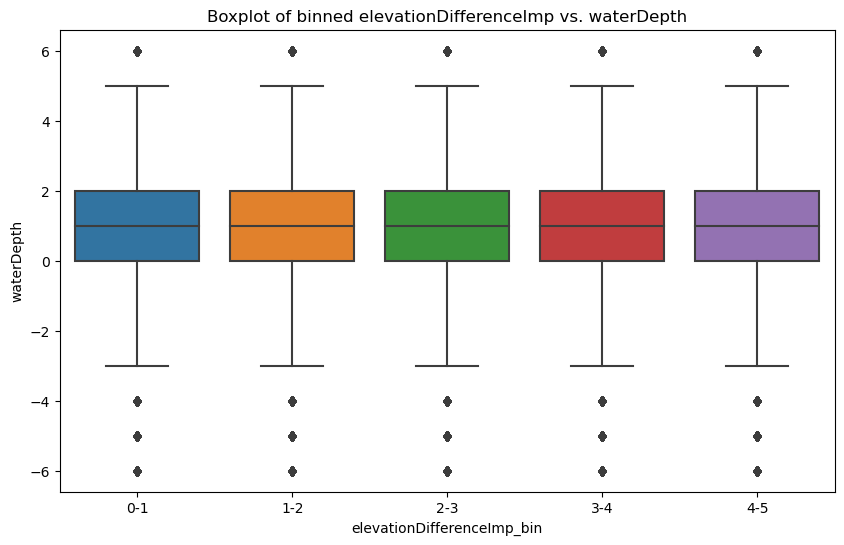

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='elevationDifferenceImp_bin', y='waterDepth', data=df)
plt.title('Boxplot of binned elevationDifferenceImp vs. waterDepth')
plt.show()


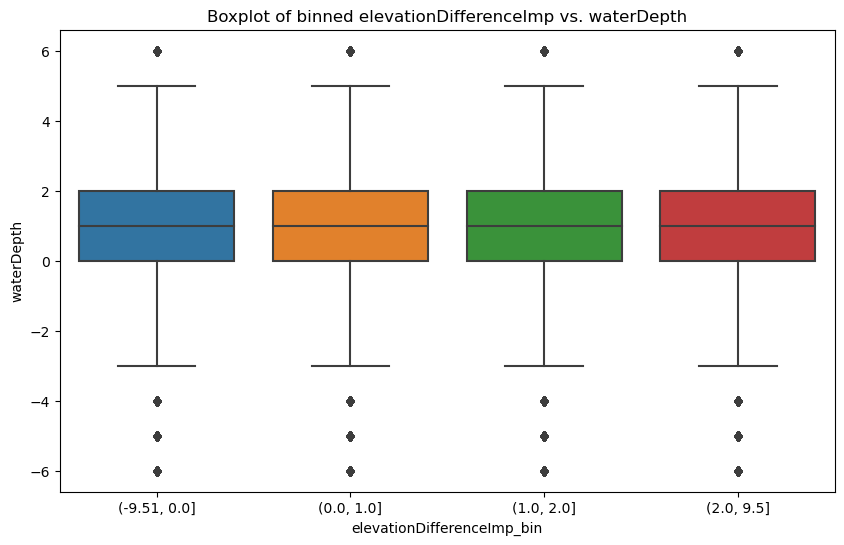

In [151]:


# Determine the number of bins
n_bins = 6

# Calculate quantile bin edges
quantiles = df['elevationDifferenceImp'].quantile([i/n_bins for i in range(n_bins+1)])

# Bin the data using quantiles
df['elevationDifferenceImp_bin'] = pd.cut(df['elevationDifferenceImp'], bins=quantiles, include_lowest=True, precision=2, duplicates='drop')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='elevationDifferenceImp_bin', y='waterDepth', data=df)
plt.title('Boxplot of binned elevationDifferenceImp vs. waterDepth')
plt.show()

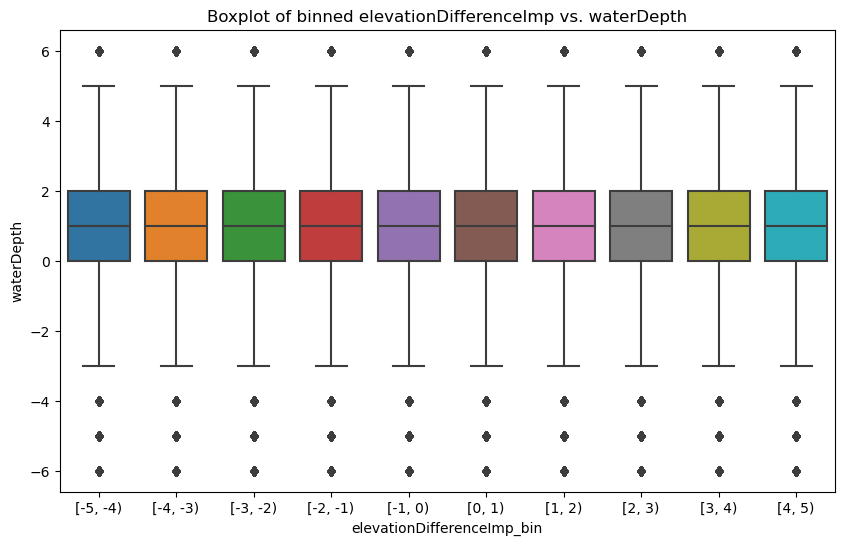

In [152]:


# Define bins from -5 to 5 in 1 unit increments
bins = list(range(-5, 6))

# Bin the data
df['elevationDifferenceImp_bin'] = pd.cut(df['elevationDifferenceImp'], bins=bins, include_lowest=True, right=False)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='elevationDifferenceImp_bin', y='waterDepth', data=df)
plt.title('Boxplot of binned elevationDifferenceImp vs. waterDepth')
plt.show()